# ADASYN with Imbalance Data

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
Data = pd.read_csv('../01_Embedding/PCA/EmbeddedData/train_PCA.csv')

In [3]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

In [4]:
y=pd.DataFrame(y)

In [5]:
type(y)

pandas.core.frame.DataFrame

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
headers = X.columns.copy()
headers

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39'],
      dtype='object')

0    252147
1     34793
Name: FraudFound, dtype: int64

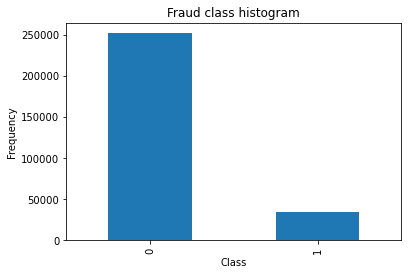

In [8]:
pd.value_counts(y['FraudFound']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y['FraudFound'].value_counts()

In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.293363,0.484208,-0.778605,0.196901,0.203080,-0.276181,0.163840,-0.727228,0.164783,0.282505,...,0.280461,0.112511,-0.167565,0.241680,0.134053,0.049167,0.008604,-0.335652,0.338084,0.639564
1,-1.000537,0.782714,0.641157,-1.262007,0.339296,-0.191242,-0.052936,-0.478059,0.381229,-0.075820,...,-0.035147,-0.003026,0.012833,-0.265793,0.115587,0.252825,0.117377,0.803869,-0.029065,0.325390
2,0.880765,1.668059,-0.147633,-1.082997,0.056403,0.058890,-0.613773,0.164287,0.020482,0.257657,...,0.115437,0.045513,0.115059,0.073766,-0.026498,-0.047192,-0.012115,-0.004044,0.008801,0.080400
3,-0.386926,-1.223401,-0.066371,-1.067165,-0.538200,0.248088,-0.471275,-0.860523,0.083781,-0.325903,...,-0.329045,-0.427553,0.368932,0.338526,0.166647,0.040206,-0.188958,0.034582,-0.090650,-0.045612
4,-1.477190,0.319217,-0.624764,0.611954,0.157849,-0.009979,-0.583149,0.228993,-0.282527,0.152813,...,0.050633,0.076408,-0.140688,0.208800,-0.307799,-0.133149,-0.013142,-0.109237,-0.255567,0.134722


In [10]:
X = np.array(X)
y = np.array(y)
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (286940, 40)
Shape of y: (286940, 1)


In [11]:
type(X)

numpy.ndarray

In [12]:
from imblearn.over_sampling import ADASYN #, SMOTE 
from collections import Counter
from sklearn.svm import LinearSVC

Using TensorFlow backend.


In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

# sm = SMOTE(random_state=2)
X_res, y_res = ADASYN().fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': [34793]
Before OverSampling, counts of label '0': [252147] 

After OverSampling, the shape of train_X: (504354, 40)
After OverSampling, the shape of train_y: (504354,) 

After OverSampling, counts of label '1': 252207
After OverSampling, counts of label '0': 252147


In [20]:
# pd.value_counts(y['FraudFound']).plot.bar()
# plt.title('Fraud class histogram')
# plt.xlabel('Class')
# plt.ylabel('Frequency')
# y['FraudFound'].value_counts()

In [21]:
type(X_res)

numpy.ndarray

In [22]:
type(y_res)

numpy.ndarray

In [23]:
X_ADASYN = pd.DataFrame(X_res)
X_ADASYN.columns = headers

In [24]:
type(y_res)

numpy.ndarray

In [25]:
y_ADASYN = pd.DataFrame(y_res)
y_ADASYN.columns = ['FraudFound']
y_ADASYN.head()

,FraudFound
0,1
1,0
2,0
3,0
4,0


In [26]:
X_ADASYN.to_csv(r"../Data/ADASYN/X_PCA_ADASYN.csv", index=False)
y_ADASYN.to_csv(r"../Data/ADASYN/y_PCA_ADASYN.csv", index=False)

In [27]:
ADASYN = X_ADASYN
ADASYN['FraudFound'] = y_res

In [28]:
ADASYN.to_csv(r"../Data/ADASYN/PCA_ADASYN.csv", index=False)